In [1]:
import sys
sys.path.append('/Users/paolamartire/shocks')

import numpy as np
import matplotlib.pyplot as plt
import Utilities.prelude
import k3match

from Test.TESToperators import old_calc_grad, calc_grad, make_tree, another_grad

In [2]:
def search_delta(X, Y, Z, point, dim_cell, choose):
    x_point = point[0]
    y_point = point[1]
    z_point = point[2]

    _, _ , dist= k3match.cartesian(X, Y, Z, x_point, y_point, z_point, 2.5*dim_cell)

    # print('how many neighbours? ', np.shape(dist))
    
    if choose == 'mean':
        delta = np.mean(dist)
    if choose == 'min':
        delta = np.min(dist)
    if choose == 'max':
        delta = np.max(dist)
    
    return delta

In [3]:
sim_tree, X, Y, Z, Vol, VX, _, _, _, _, _ = make_tree('sedov/100', 100)
dim_cell = (3*Vol/(4*np.pi))**(1/3)
#choose an easy function to know its derivative
VX = np.sin(X) 

all T=0, bro. Compute by myself!


In [4]:
step_big_arbitrary = 0.3
step_grad_meantot = 2*np.mean(dim_cell)
step_grad_mintot = 2*np.min(dim_cell)

In [5]:
grad_big = []
grad_meantot = []
grad_mintot = []
grad_meanloc = []
grad_maxloc = []
grad_minloc = []
grad_test = []
final_idea = []
to_plot = []
X_plot = [] 
Y_plot = [] 
Z_plot = [] 

for i in range(7500,10000):
    print(i)
    point = [X[i],Y[i],Z[i]]

    if np.linalg.norm(point)>0.98:
        continue

    to_plot.append(np.cos(X[i])) #d/dx(sinx)
    X_plot.append(X[i])
    Y_plot.append(Y[i])
    Z_plot.append(Z[i])
    final_idea.append(another_grad(sim_tree, X, Y, Z, VX, point)[0])

    grad_big.append(old_calc_grad(sim_tree, X, Y, Z, VX, point, step_big_arbitrary)[0])
    grad_meantot.append(old_calc_grad(sim_tree, X, Y, Z, VX, point, step_grad_meantot)[0])
    grad_mintot.append(old_calc_grad(sim_tree, X, Y, Z, VX, point, step_grad_mintot)[0])
    
    step_grad_meanloc = search_delta(X, Y, Z, point, dim_cell[i], 'mean')
    grad_meanloc.append(old_calc_grad(sim_tree, X, Y, Z, VX, point, step_grad_meanloc)[0])
    step_grad_maxloc = search_delta(X, Y, Z, point, dim_cell[i], 'max')
    grad_maxloc.append(old_calc_grad(sim_tree, X, Y, Z, VX, point, step_grad_maxloc)[0])
    step_grad_minloc = search_delta(X, Y, Z, point, dim_cell[i], 'min')
    grad_minloc.append(old_calc_grad(sim_tree, X, Y, Z, VX, point, step_grad_minloc)[0])

    grad_test.append(calc_grad(sim_tree, X, Y, Z, VX, point, step_grad_mintot)[0])

7500
7501
7502
7503


/Users/paolamartire/shocks/Test/TESToperators.py:111: RuntimeWarning: invalid value encountered in scalar divide
  delta_fx = (fpost_x-fpre_x) / (post_xcoord-pre_xcoord)
/Users/paolamartire/shocks/Test/TESToperators.py:112: RuntimeWarning: invalid value encountered in scalar divide
  delta_fy = (fpost_y-fpre_y)/ (post_ycoord-pre_ycoord)
/Users/paolamartire/shocks/Test/TESToperators.py:113: RuntimeWarning: invalid value encountered in scalar divide
  delta_fz = (fpost_z-fpre_z) / (post_zcoord-pre_zcoord)


7504
7505
7506
7507
7508
7509
7510
7511
7512
7513
7514
7515
7516
7517
7518
7519
7520
7521
7522
7523
7524
7525
7526
7527
7528
7529
7530
7531
7532
7533
7534
7535
7536
7537
7538
7539
7540
7541
7542
7543
7544
7545
7546
7547
7548
7549
7550
7551
7552
7553
7554
7555
7556
7557
7558
7559
7560
7561
7562
7563
7564
7565
7566
7567
7568
7569
7570
7571
7572
7573
7574
7575
7576
7577
7578
7579
7580
7581
7582
7583
7584
7585
7586
7587
7588
7589
7590
7591
7592
7593
7594
7595
7596
7597
7598
7599
7600
7601
7602
7603
7604
7605
7606
7607
7608
7609
7610
7611
7612
7613
7614
7615
7616
7617
7618
7619
7620
7621
7622
7623
7624
7625
7626
7627
7628
7629
7630
7631
7632
7633
7634
7635
7636
7637
7638
7639
7640
7641
7642
7643
7644
7645
7646
7647
7648
7649
7650
7651
7652
7653
7654
7655
7656
7657
7658
7659
7660
7661
7662
7663
7664
7665
7666
7667
7668
7669
7670
7671
7672
7673
7674
7675
7676
7677
7678
7679
7680
7681
7682
7683
7684
7685
7686
7687
7688
7689
7690
7691
7692
7693
7694
7695
7696
7697
7698
7699
7700
7701
7702
7703


In [40]:
final_idea = np.array(final_idea)
grad_big = np.array(grad_big)
grad_meantot = np.array(grad_meantot)
grad_mintot = np.array(grad_mintot)
grad_meanloc = np.array(grad_meanloc)
grad_maxloc = np.array(grad_maxloc)
grad_minloc = np.array(grad_minloc)
grad_test = np.array(grad_test)
final_idea = np.array(final_idea)
to_plot = np.array(to_plot)

In [41]:
ratio_finalidea = 1- final_idea / to_plot 
ratio_big = 1- grad_big / to_plot 
ratio_meantot = 1- grad_meantot / to_plot
ratio_mintot = 1- grad_mintot / to_plot
ratio_meanloc = 1- grad_meanloc / to_plot
ratio_minloc = 1- grad_minloc / to_plot
ratio_maxloc = 1- grad_maxloc / to_plot
ratio_test = 1- grad_test / to_plot
ratio_final = 1- final_idea / to_plot

Text(0.5, 1.0, '$\\partial\\sin(x)$')

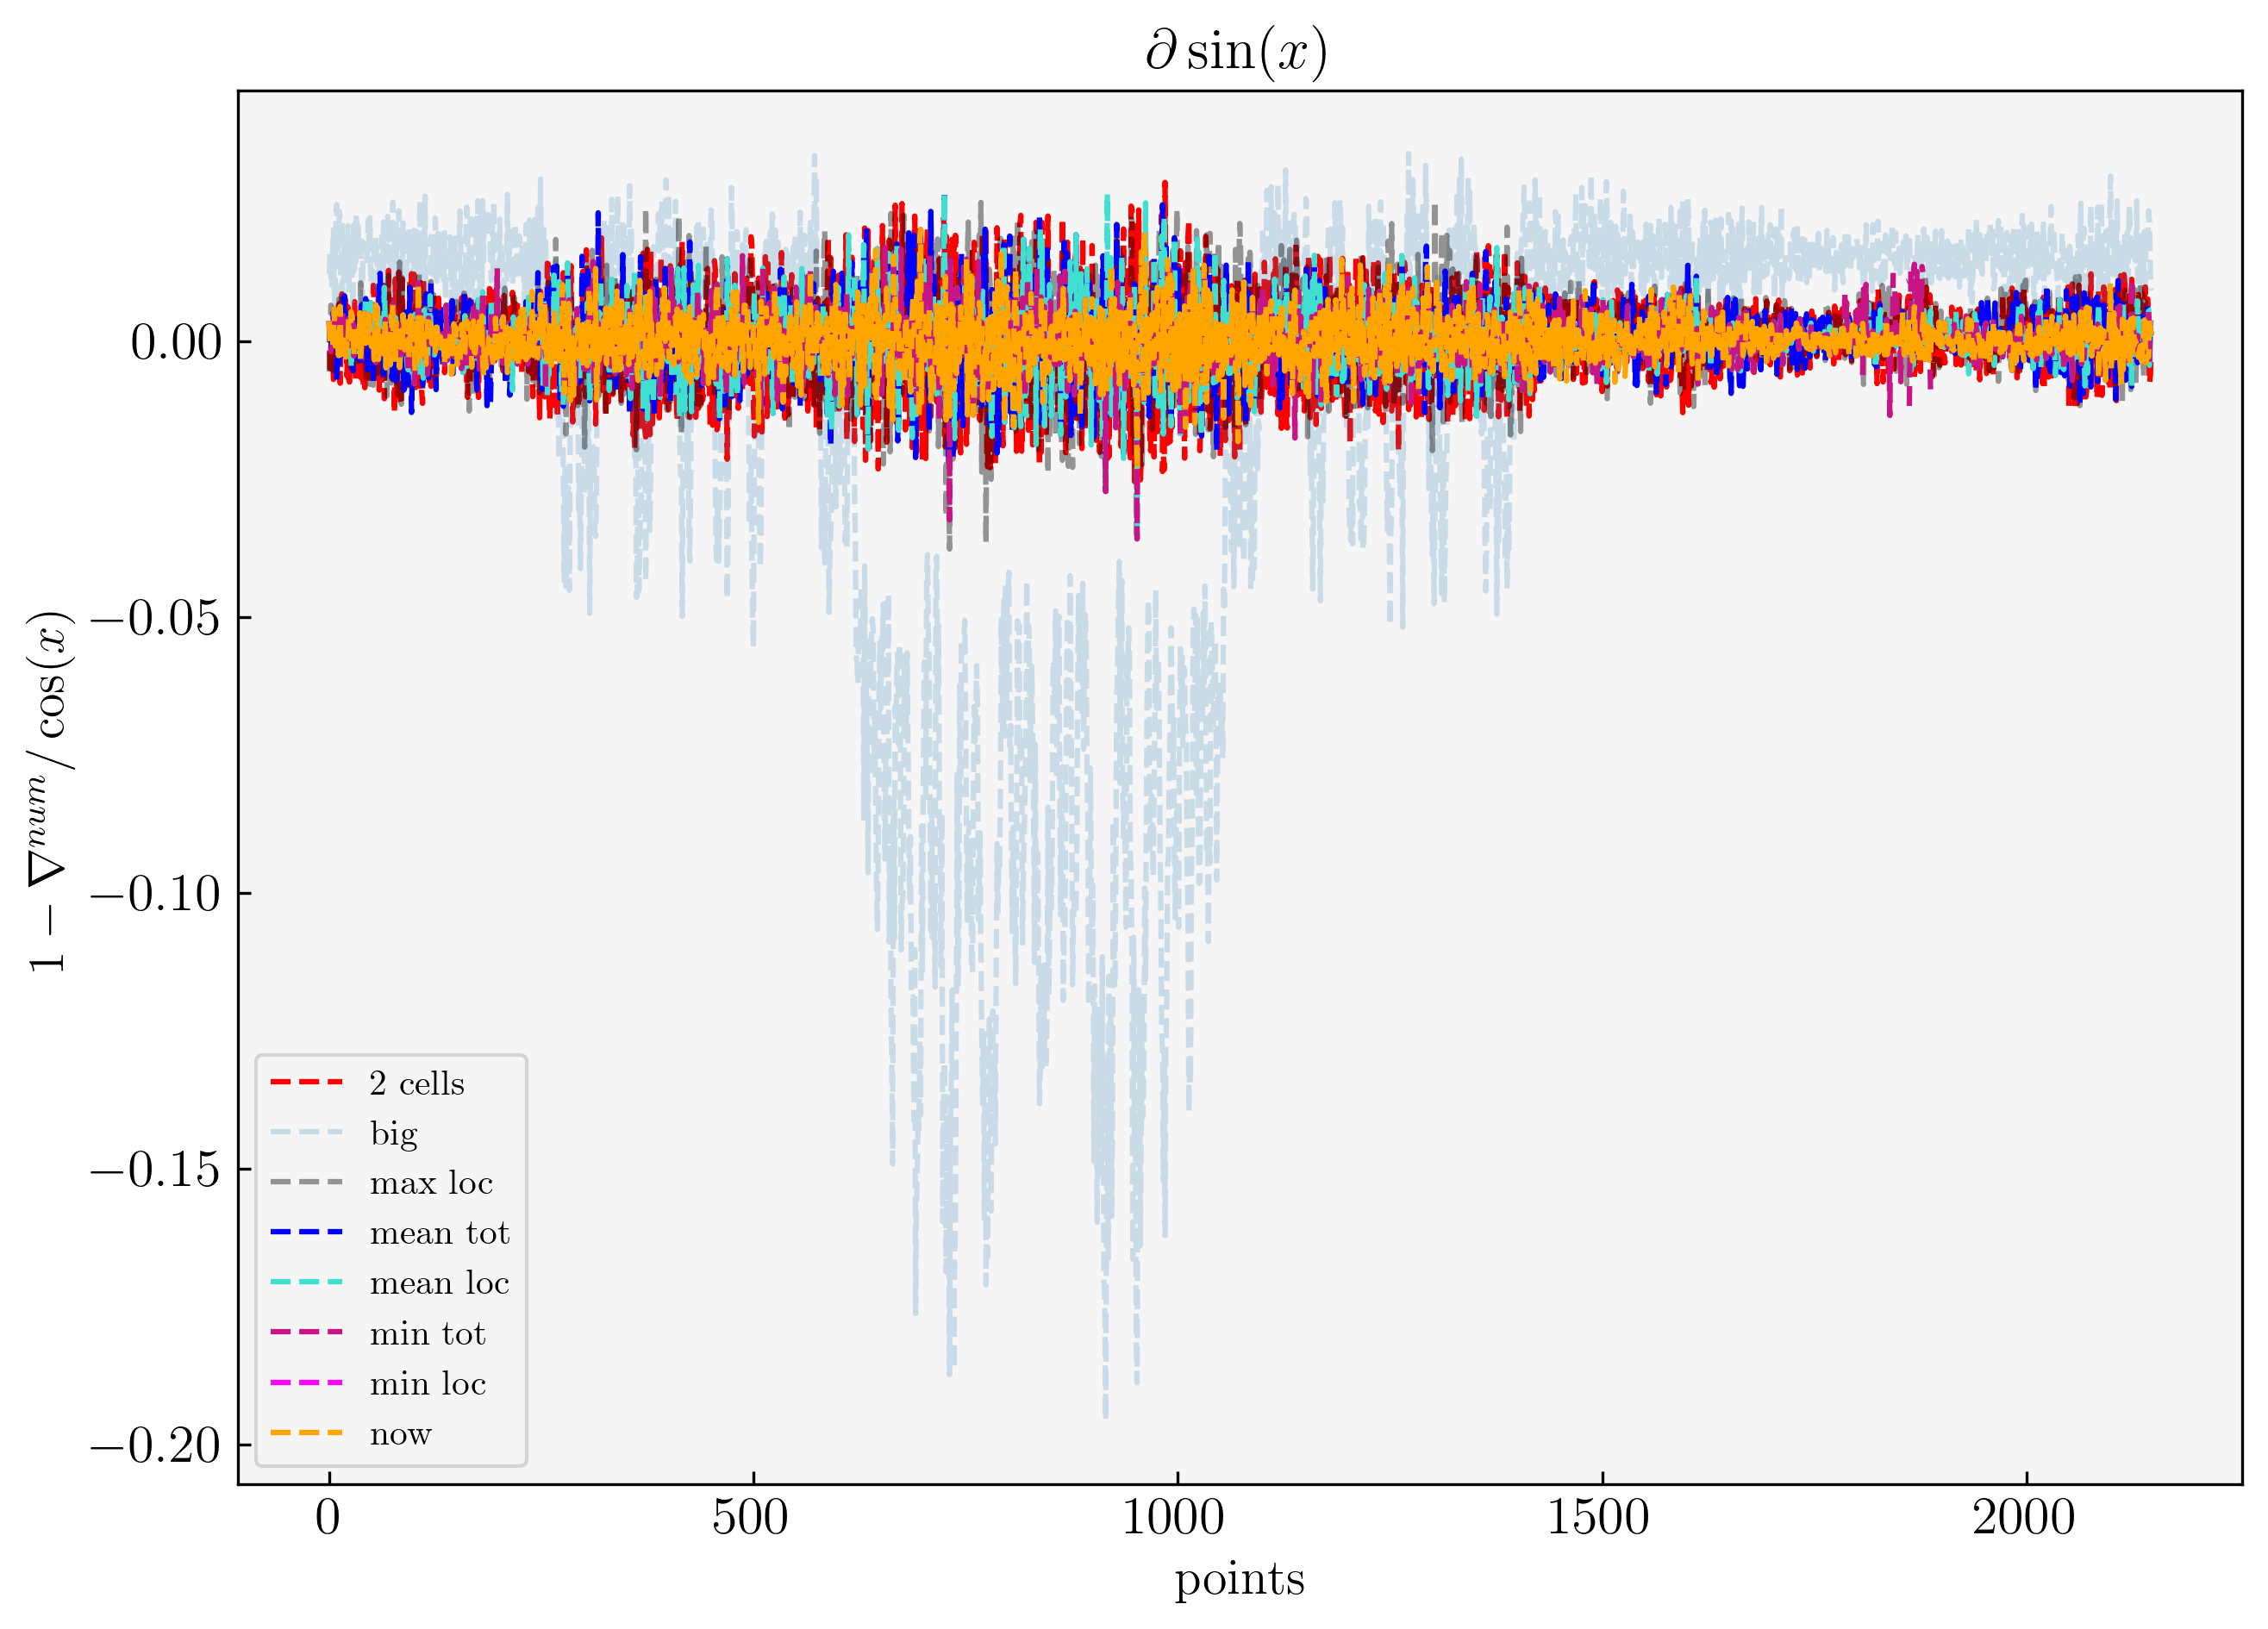

In [45]:
# - Gradient T
fig, ax = plt.subplots(1,1, figsize = (10,7))
ax.set_xlabel('points', fontsize = 14)
ax.set_ylabel(r'$1-\nabla^{num}/\cos(x)$', fontsize = 14)
ax.plot(ratio_final, '--', label = '2 cells', c = 'r')
ax.plot(ratio_big, '--', label = 'big', alpha = 0.2)
ax.plot(ratio_maxloc, '--', label = 'max loc', alpha = 0.4, c = 'k')
ax.plot(ratio_meantot, '--', c = 'b', label = 'mean tot')
ax.plot(ratio_meanloc, '--', c = 'turquoise', label = 'mean loc')
ax.plot(ratio_mintot, '--', c = 'mediumvioletred', label = 'min tot')
ax.plot(ratio_minloc, '--', c = 'magenta', label = 'min loc')
ax.plot(ratio_test, '--', c = 'orange',label = 'now')
#ax.plot(ratio_final, '--', label = 'final')
plt.legend()
plt.title(r'$\partial\sin(x)$', fontsize = 16)
#plt.savefig(f'TESTgrad.pdf')

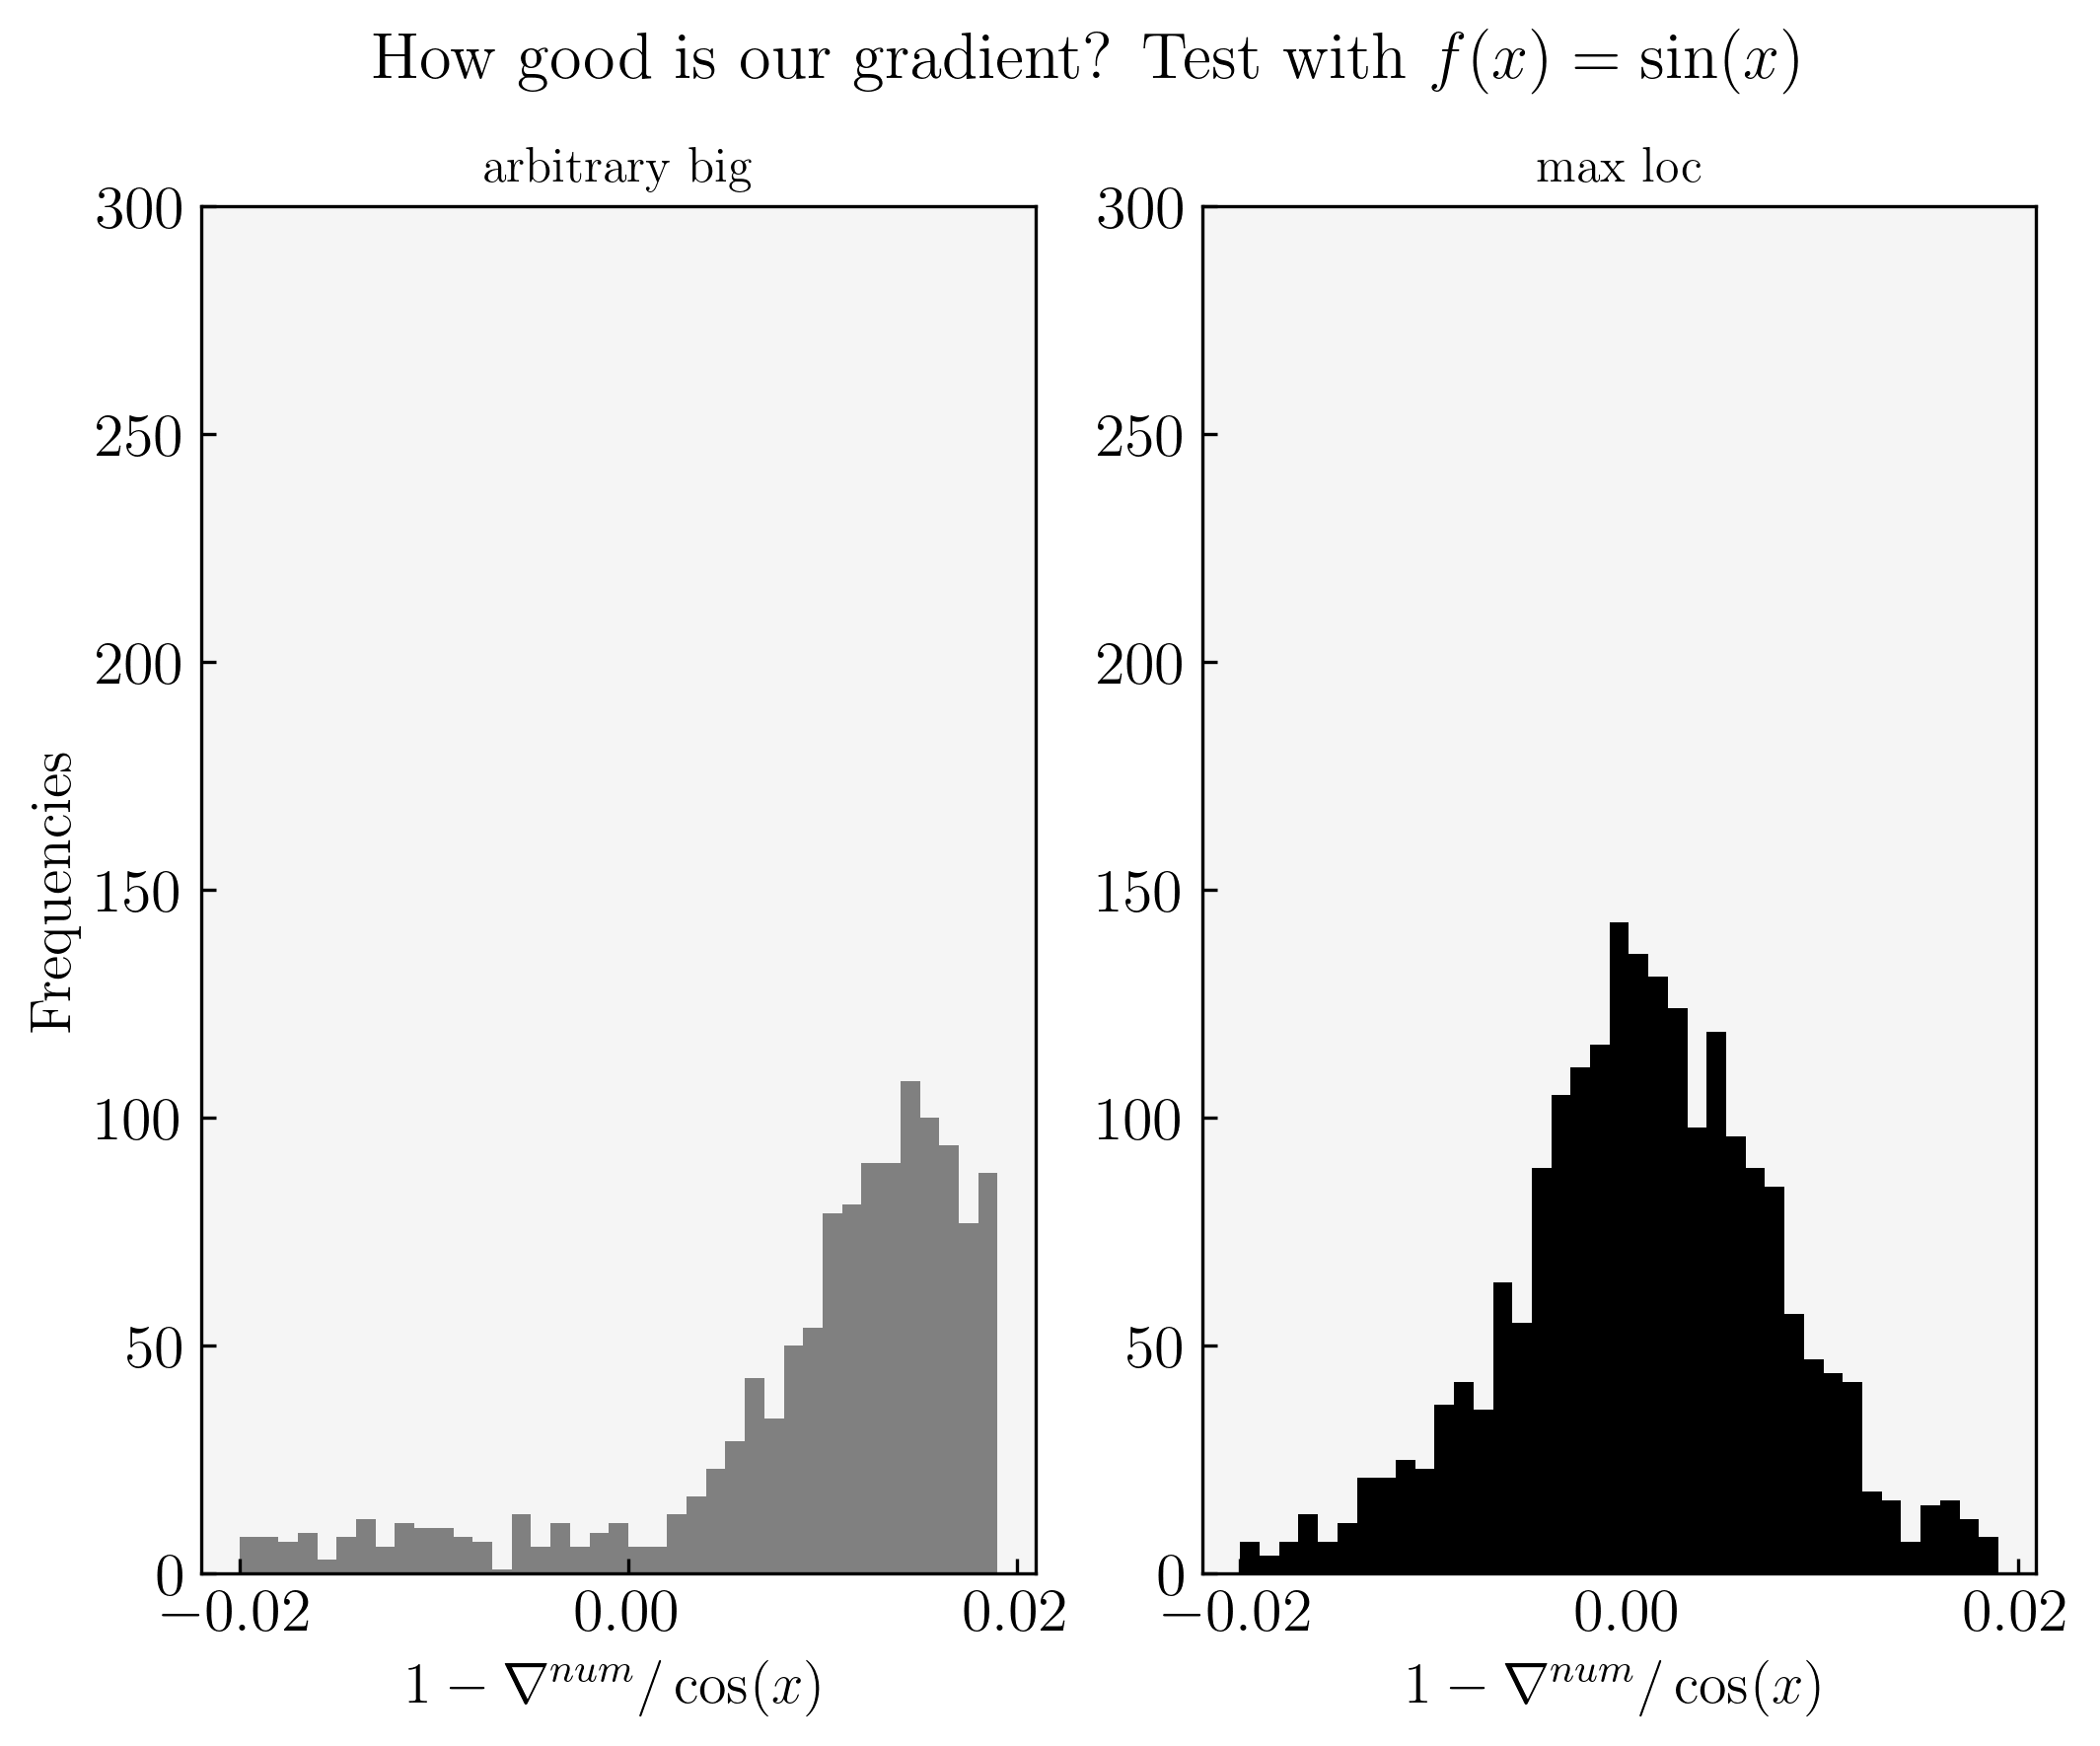

In [27]:
# Histograms to see how big is the gradient. X component
fig, ax1 = plt.subplots(1,2)
bins = np.arange(-0.02, 0.02, 0.001)
ax1[0].hist(ratio_big, bins = bins, color = 'gray', label = 'mean tot')
ax1[1].hist(ratio_maxloc, bins = bins, color = 'k', label = 'mean loc')

ax1[0].set_xlabel(r'$1-\nabla^{num}/\cos(x)$', fontsize = 14)
ax1[1].set_xlabel(r'$1-\nabla^{num}/\cos(x)$', fontsize = 14)
ax1[0].set_ylabel('Frequencies', fontsize = 14)
ax1[0].set_title('arbitrary big')
ax1[0].set_ylim(0,300)
ax1[1].set_title('max loc')
ax1[1].set_ylim(0,300)
plt.suptitle(r'How good is our gradient? Test with $f(x)=\sin(x)$', fontsize = 16)
plt.savefig('TESTgradhistworst.png')

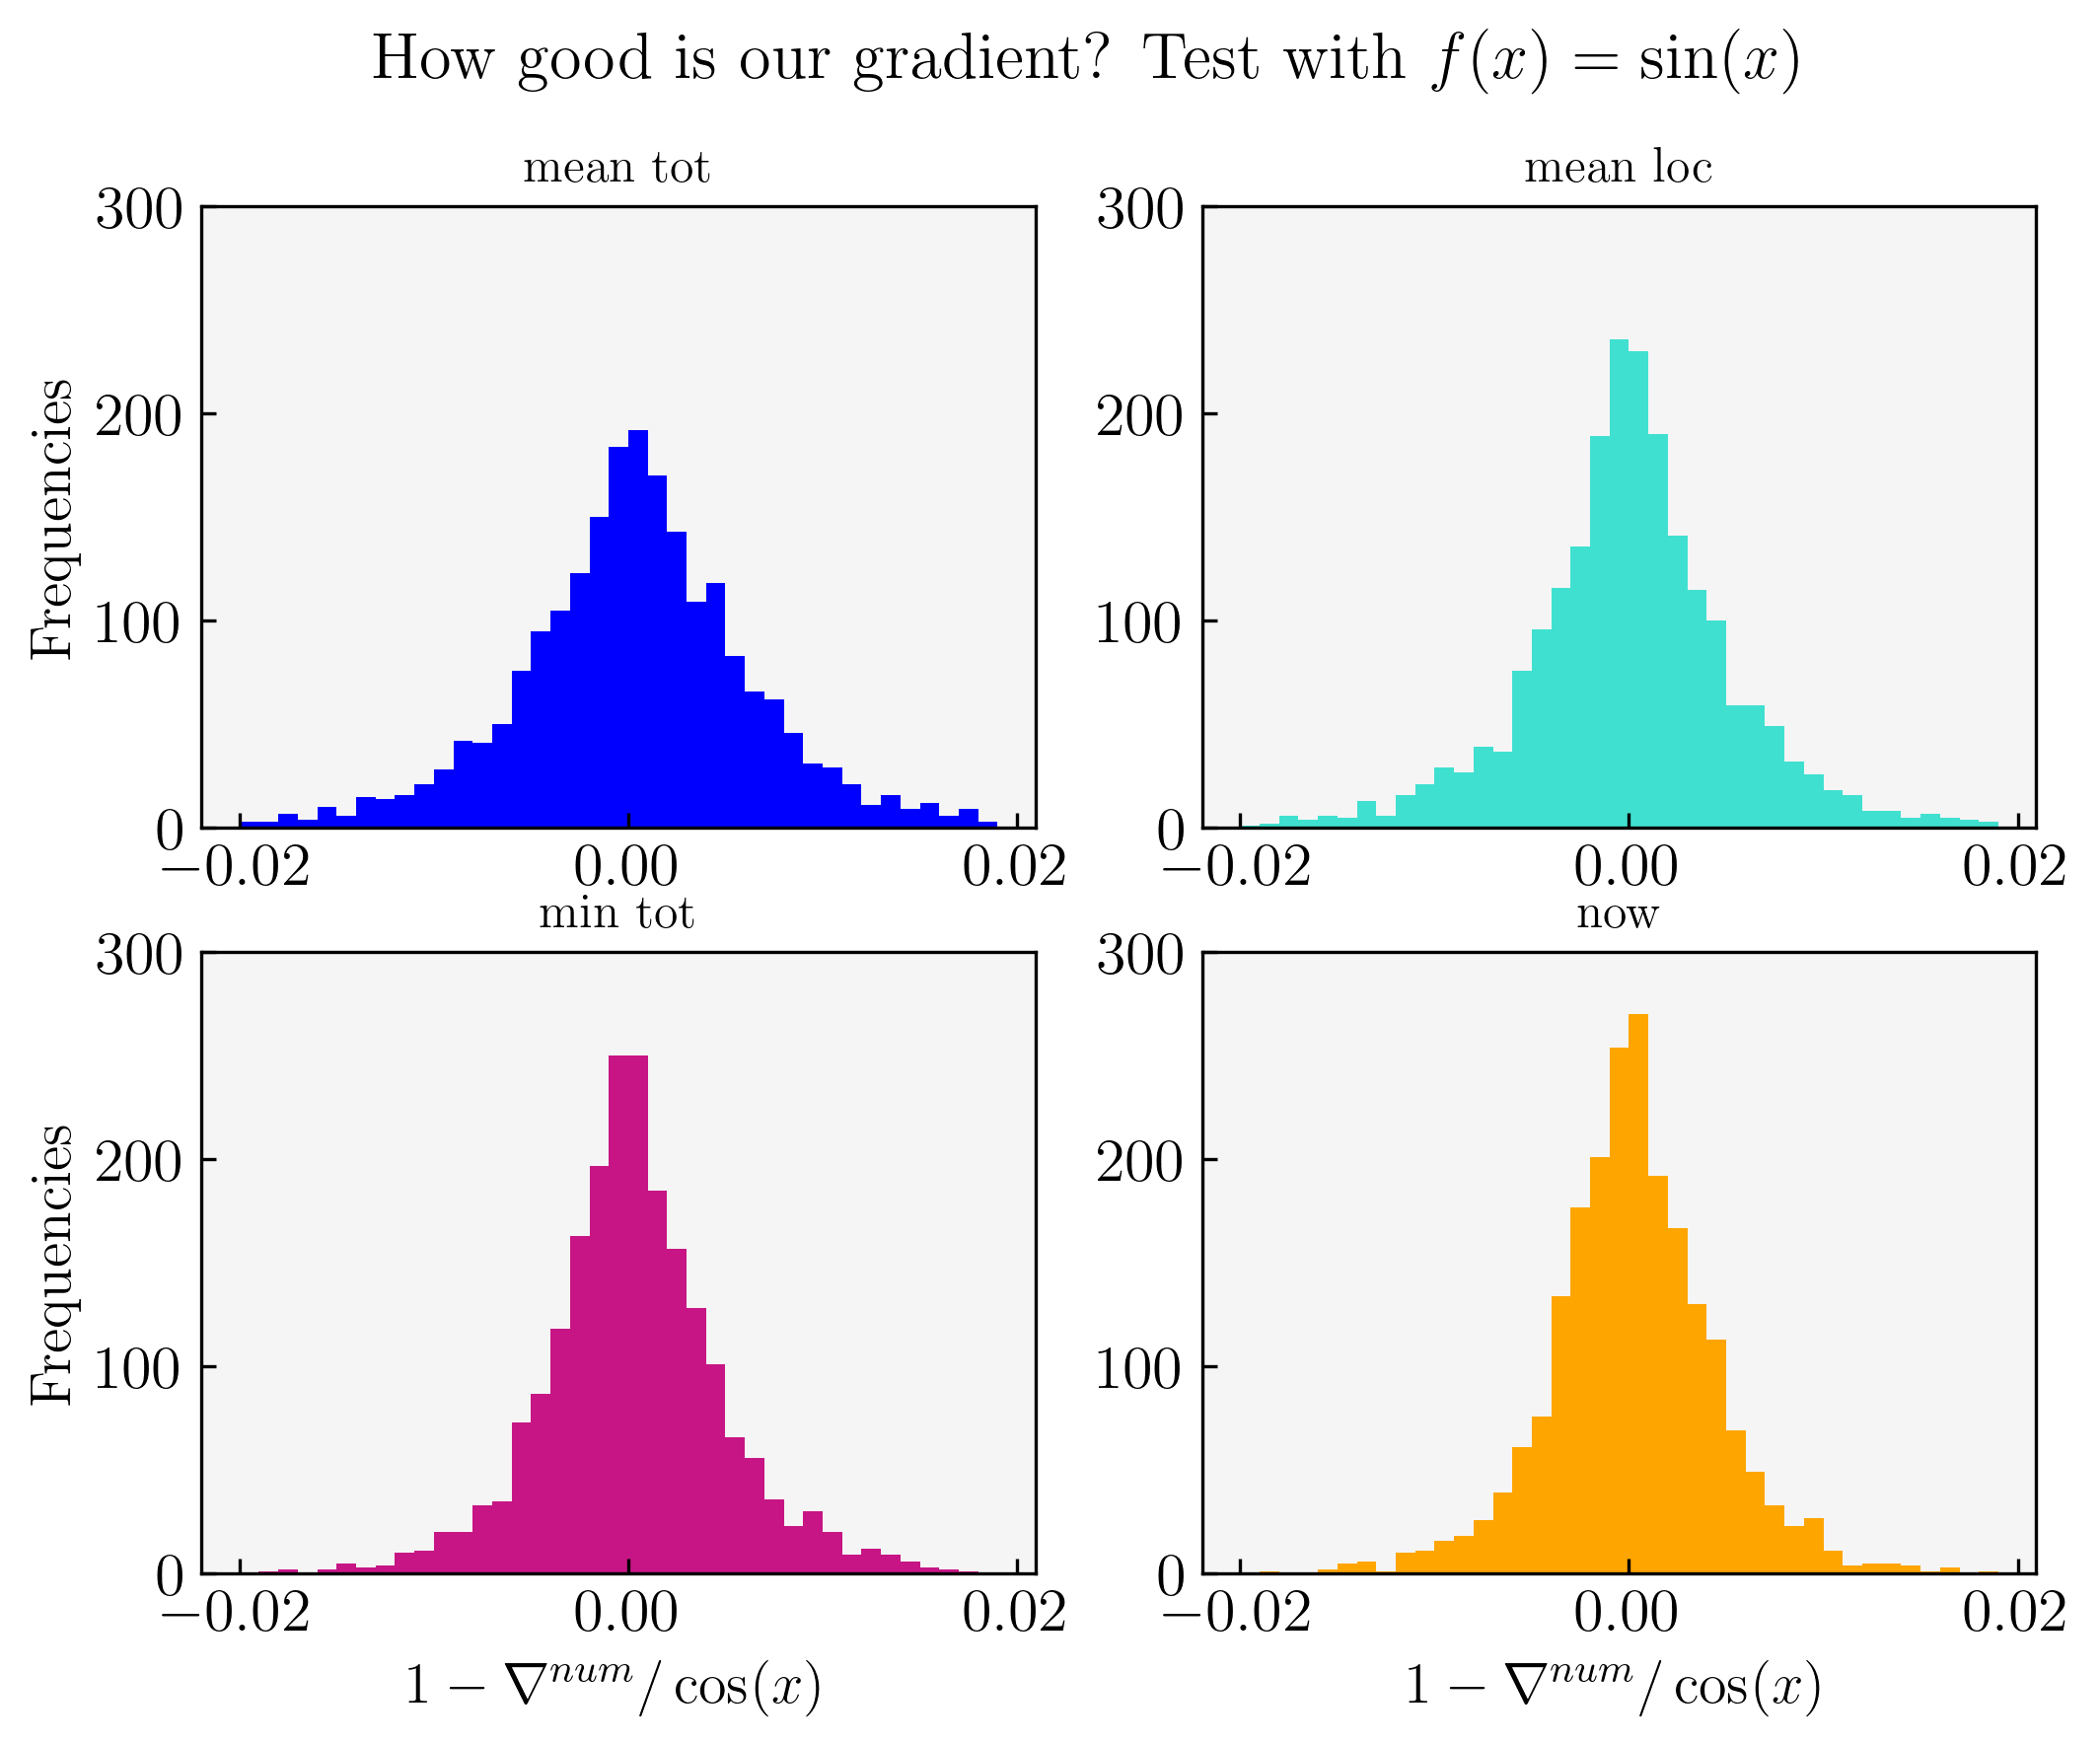

In [36]:
# Histograms to see how big is the gradient. X component
fig, ax = plt.subplots(2,2)
bins = np.arange(-0.02, 0.02, 0.001)
ax[0][0].hist(ratio_meantot, bins = bins, color = 'b', label = 'mean tot')
ax[0][1].hist(ratio_meanloc, bins = bins, color = 'turquoise', label = 'mean loc')
ax[1][0].hist(ratio_mintot, bins = bins, color = 'mediumvioletred', label = 'min tot')
ax[1][1].hist(ratio_test, bins = bins, color = 'orange', label = 'now')

ax[1][0].set_xlabel(r'$1-\nabla^{num}/\cos(x)$', fontsize = 14)
ax[1][1].set_xlabel(r'$1-\nabla^{num}/\cos(x)$', fontsize = 14)
ax[0][0].set_ylabel('Frequencies', fontsize = 14)
ax[1][0].set_ylabel('Frequencies', fontsize = 14)
ax[0][0].set_title('mean tot')
ax[0][0].set_ylim(0,300)
ax[0][1].set_title('mean loc')
ax[0][1].set_ylim(0,300)
ax[1][0].set_title('min tot')
ax[1][0].set_ylim(0,300)
ax[1][1].set_title('now')
ax[1][1].set_ylim(0,300)
plt.suptitle(r'How good is our gradient? Test with $f(x)=\sin(x)$', fontsize = 16)
plt.savefig('TESTgradhist.png')



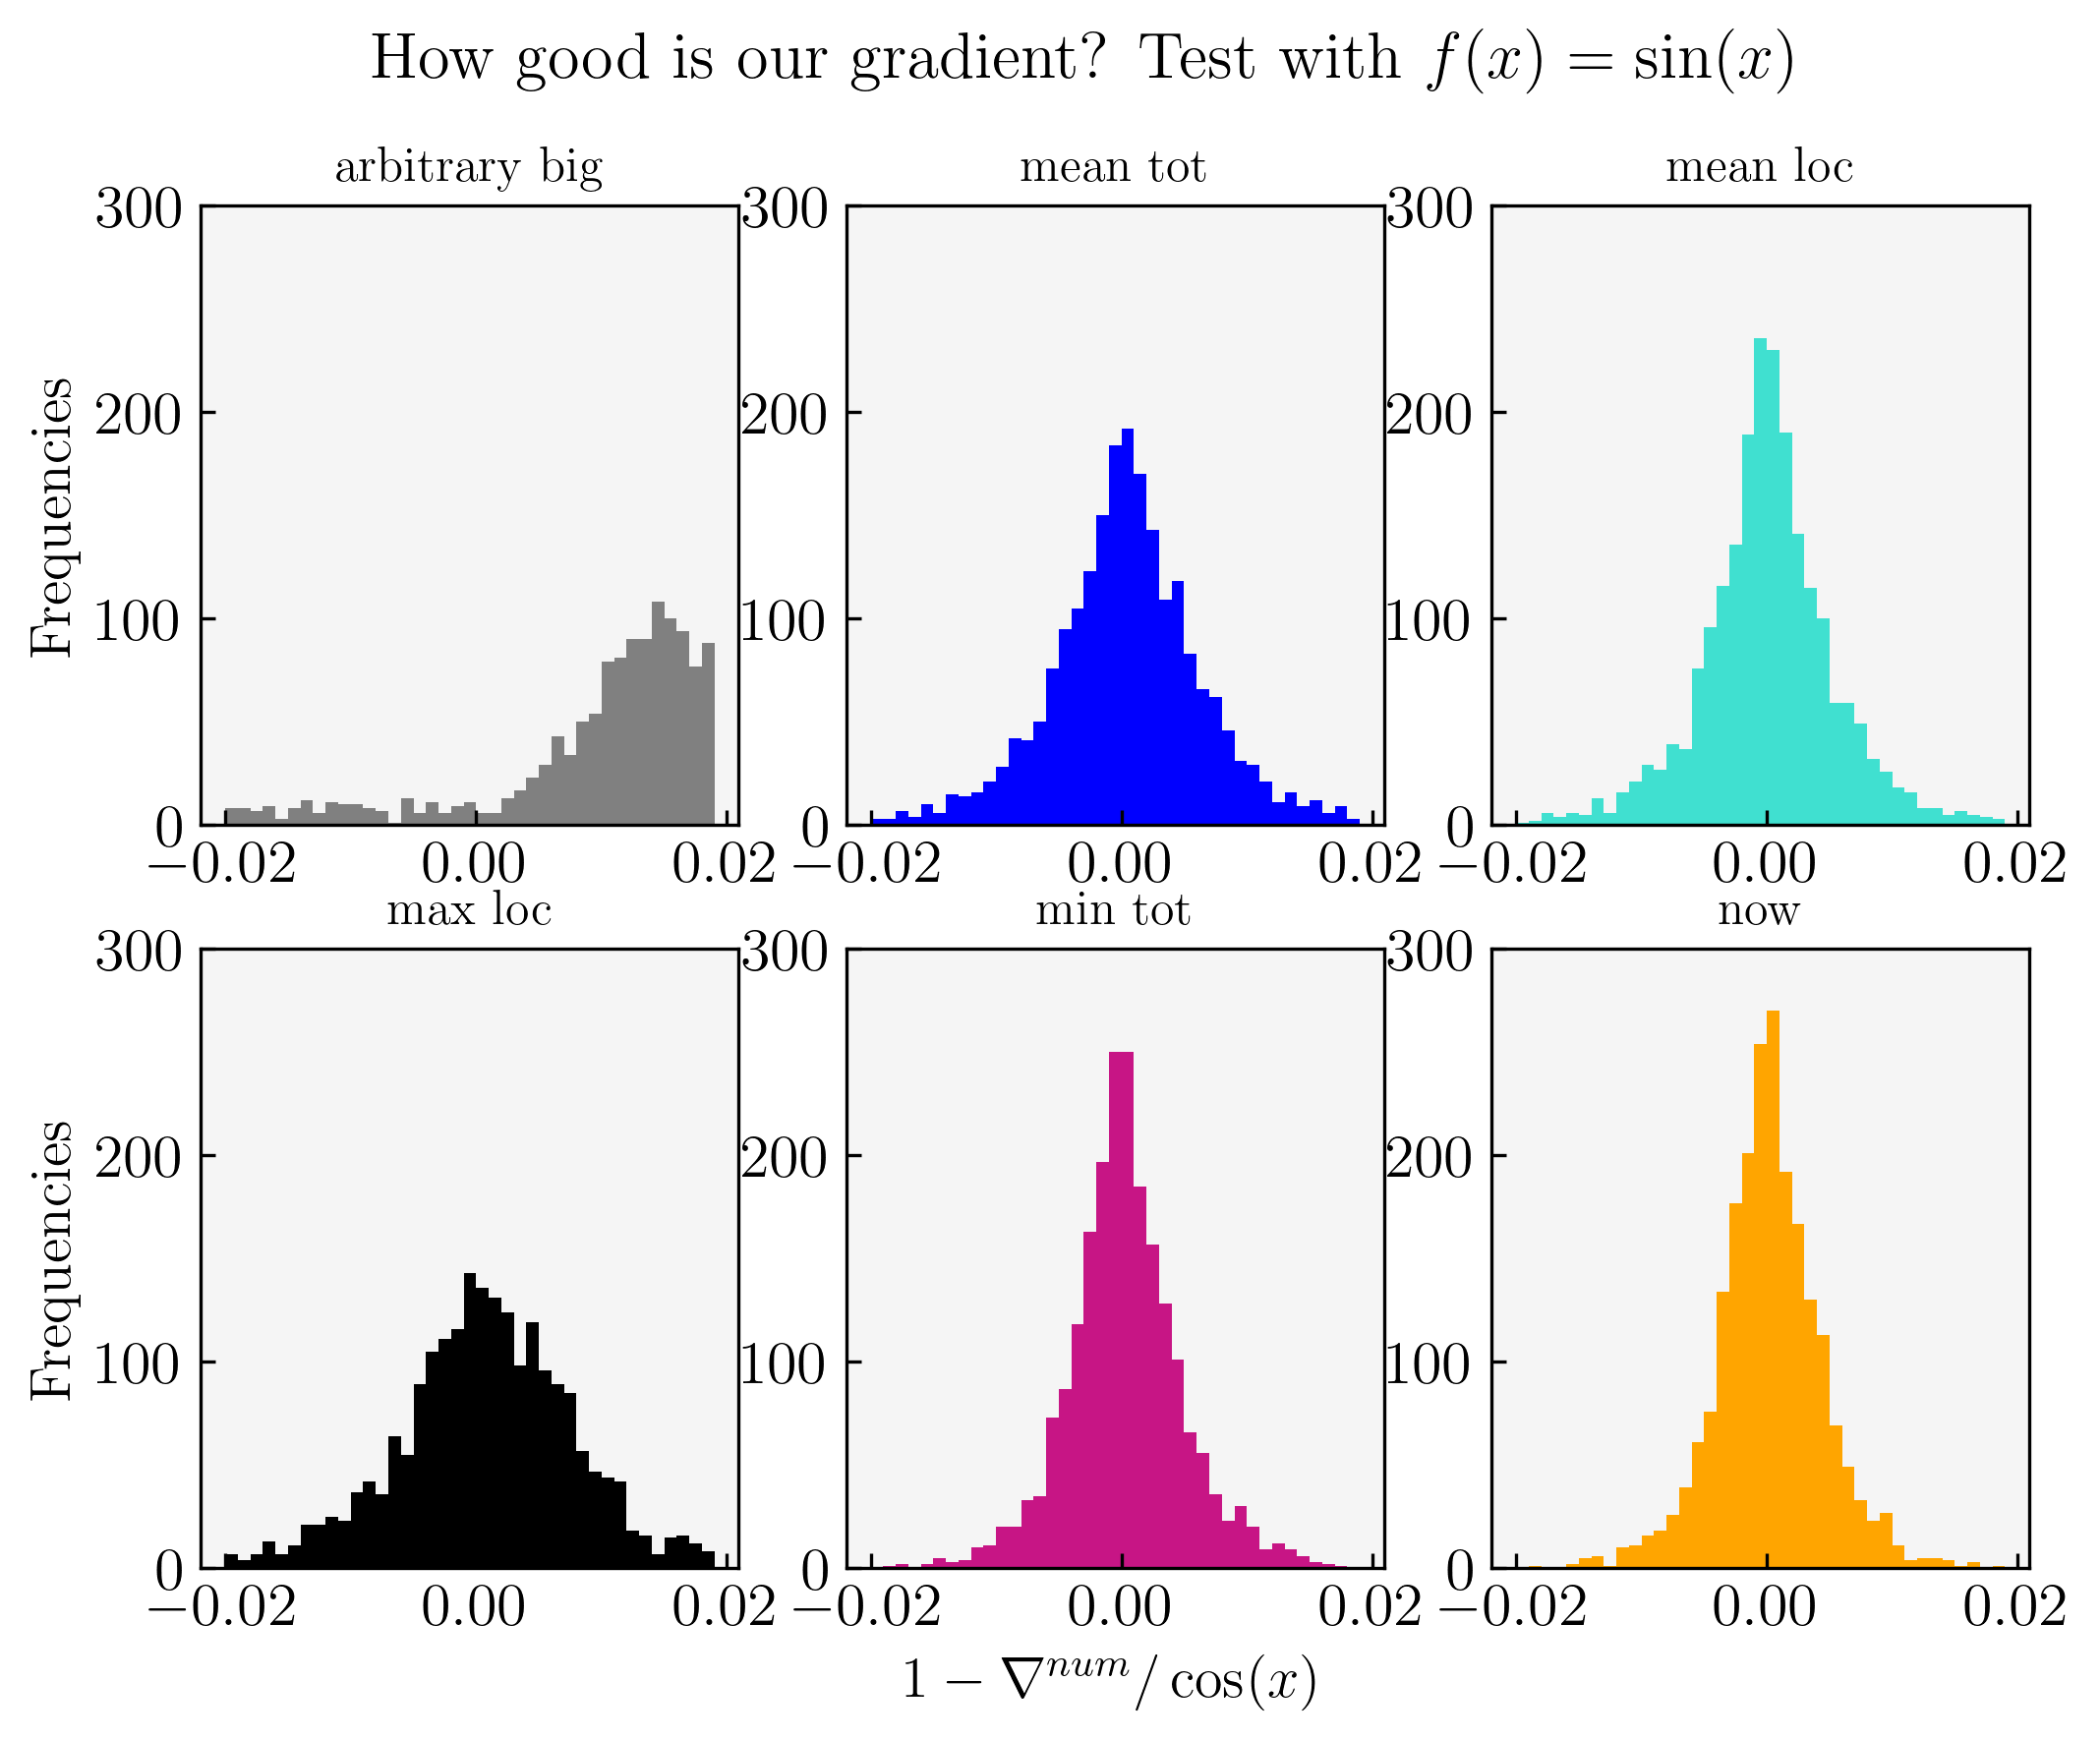

In [39]:
# Histograms to see how big is the gradient. X component
fig, ax = plt.subplots(2,3)
bins = np.arange(-0.02, 0.02, 0.001)
ax[0][0].hist(ratio_big, bins = bins, color = 'gray', label = 'mean tot')
ax[1][0].hist(ratio_maxloc, bins = bins, color = 'k', label = 'mean loc')
ax[0][1].hist(ratio_meantot, bins = bins, color = 'b', label = 'mean tot')
ax[0][2].hist(ratio_meanloc, bins = bins, color = 'turquoise', label = 'mean loc')
ax[1][1].hist(ratio_mintot, bins = bins, color = 'mediumvioletred', label = 'min tot')
ax[1][2].hist(ratio_test, bins = bins, color = 'orange', label = 'now')

ax[1][1].set_xlabel(r'$1-\nabla^{num}/\cos(x)$', fontsize = 14)
ax[0][0].set_ylabel('Frequencies', fontsize = 14)
ax[1][0].set_ylabel('Frequencies', fontsize = 14)
ax[0][0].set_title('arbitrary big')
ax[0][0].set_ylim(0,300)
ax[1][0].set_title('max loc')
ax[1][0].set_ylim(0,300)
ax[0][1].set_title('mean tot')
ax[0][1].set_ylim(0,300)
ax[0][2].set_title('mean loc')
ax[0][2].set_ylim(0,300)
ax[1][1].set_title('min tot')
ax[1][1].set_ylim(0,300)
ax[1][2].set_title('now')
ax[1][2].set_ylim(0,300)
plt.suptitle(r'How good is our gradient? Test with $f(x)=\sin(x)$', fontsize = 16)
plt.savefig('TESTgrad6.png')